## Libraries

In [155]:
import pandas as pd
import numpy as np
import matplotlib as mtp
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


## Reading & Exploring Data

In [156]:
df = pd.read_csv('machine.data',header=None)
cols = ['vendor','model','myct','mmin','mmax','cach','chmin','chmax','prp','erp']
df.columns = cols
df.head(2)

,vendor,model,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253


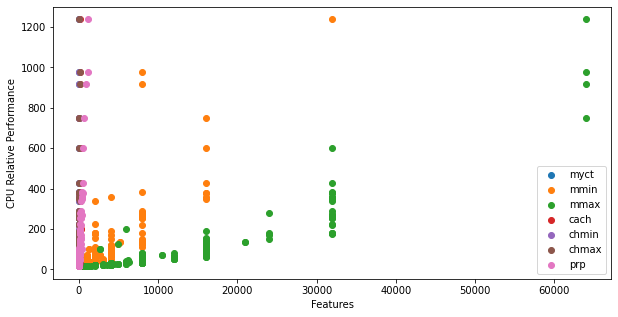

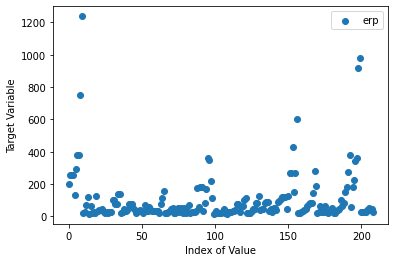

In [170]:
plt.figure(figsize=(10,5))
target = 'erp'
features = cols[2:9]
for feature in features:
    plt.scatter(x=df[feature],y=df[target],label=feature,marker='o')
plt.xlabel("Features")
plt.ylabel("CPU Relative Performance")
plt.legend()
plt.show()
# sns.heatmap(data=df.corr(),annot=True)
# plt.show()
indexes = []   # this is as a dummy x-axis
for i in range(len(df)):
    indexes.append(i)

plt.scatter(x=indexes,y=df[target],label=target,marker='o')
plt.xlabel("Index of Value")
plt.ylabel("Target Variable")
plt.legend()
plt.show()

## Separating Training & Test Data

In [158]:
x_train, x_test, y_train, y_test = train_test_split(df[features],df[target],
                                    test_size=0.35,random_state=40)

## Polynomial Regression

In [159]:
transformer = PolynomialFeatures(degree=2,interaction_only=True)
x_train_transf = transformer.fit_transform(x_train,y_train)
x_test_transf = transformer.fit_transform(x_test,y_test)
# x_train_transf,x_train,x_train_transf.shape

In [160]:
regressor = LinearRegression()
regressor.fit(x_train_transf,y_train)
regressor.score(x_test_transf,y_test)

0.9681653387519524

In [161]:
results = []
for value in x_test_transf:
    result = int(regressor.predict([value]))
    results.append(result)

## Model Accuracy

In [162]:
# using mse and its square-root
mse = mean_squared_error(y_test,results)
np.sqrt(mse)

14.870613139179405

In [163]:
# using absolute errors and mean absolute errors
absolute_errors = abs(results-y_test) #returns the array of errors
avg_abs_error = round(np.mean(absolute_errors))
avg_abs_error

6

In [164]:
# percentage of error using absolute errors
error_percentage = (absolute_errors/y_test) * 100
avg_error_percentage = np.mean(error_percentage)
print("Accuracy : " , round(100-avg_error_percentage), "%")

Accuracy :  93 %


## Features Importances

In [165]:
regressor.coef_,regressor.intercept_

(array([-1.91022733e-10,  6.95154064e-03, -9.35317619e-04,  2.99746945e-03,
         4.63379385e-01, -2.28036604e-01,  1.40510808e-01, -4.75313514e-02,
         4.81757650e-07, -1.21342426e-06, -4.04382299e-04,  2.15749145e-03,
        -1.36335718e-03, -4.89533847e-05,  4.06111695e-07,  6.15873392e-05,
         1.71263931e-04,  1.03340645e-05, -2.36315651e-05, -4.00416657e-06,
        -7.28576607e-05,  2.09565462e-05,  5.76068998e-06,  8.63180392e-03,
        -2.76290570e-03, -2.76231013e-04,  1.07682044e-03,  8.61944428e-03,
         3.99160065e-04]),
 12.806336183069817)

## Plotting Predictions vs Actual 

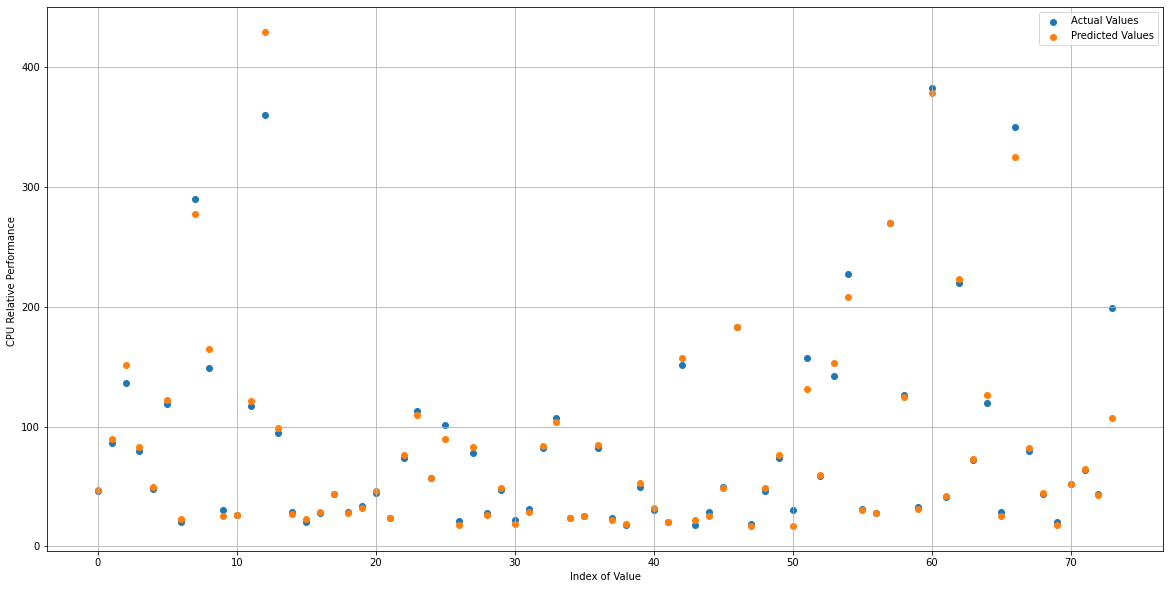

In [166]:
indexes = []   # this is as a dummy x-axis
for i in range(len(y_test)):
    indexes.append(i)
plt.figure(figsize=(20,10))
plt.scatter(indexes,y_test,label="Actual Values")
plt.scatter(indexes,results,label="Predicted Values")
plt.xlabel("Index of Value")
plt.ylabel("CPU Relative Performance ")
plt.legend()
plt.grid(True)
plt.show()